In [279]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [280]:
# import csvs
readCrime = pd.read_csv('crimedata2.csv')
readCounty = pd.read_csv('NumberUnemployed.csv')
secondCrime = pd.read_csv('CrimeData.csv')
unemployment = pd.read_csv('PercentUnemployed.csv')
laborForce = pd.read_csv('TotalEmployment.csv')

In [281]:
# Convert county names to lower case
readCrime['county'] = readCrime['county'].str.lower()
secondCrime['county'] = secondCrime['county'].str.lower()
readCounty['county'] = readCounty['county'].str.lower()
laborForce['county'] = laborForce['county'].str.lower()
unemployment['county'] = unemployment['county'].str.lower()

# Remove space and county from county list
readCounty['county'] = readCounty['county'].str.replace(" county", "")
laborForce['county'] = laborForce['county'].str.replace(" county", "")
unemployment['county'] = unemployment['county'].str.replace(" county", "")

# Add two crime dataframes together and reset index
combCrime = readCrime.append(secondCrime)
combCrime.reset_index(inplace=True)

# Merge county dataframes with county dataframe, percents with that, and population with that
mergedDF = pd.merge(readCounty, combCrime, on=['state','county','Year'], how='inner')
percentDF = pd.merge(mergedDF, unemployment, on=['state','county','Year'])

# Grab only columns we want
finalDF = pd.merge(percentDF, laborForce, on=['state','county','Year'])

# Make Pretty
selectColumnsDF = finalDF[['Year', 'state', 'county', 'Average (Monthly) Number Unemployed', 
                         'Average (Monthly) Percent Unemployed', 'count', 'Average Total Employment']]
formattedDF = selectColumnsDF.rename(columns={'state': 'State', 'county': 'County', 
                            'Average (Monthly) Number Unemployed': 'Average Number Unemployed',
                           'Average (Monthly) Percent Unemployed': 'Average Percent Unemployed',
                           'count': 'Number of Crimes', 'Average Total Employment': 'Total Labor Force'})

# Show
formatted = formattedDF[formattedDF['Number of Crimes'] != 0]
formattedDF.head()

,Year,State,County,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force
0,2010,AL,lee,6005.750000,9.025000,7107,66764.16667
1,2011,AL,lee,5503.583333,8.050000,9148,68315.50000
2,2012,AL,lee,4671.250000,6.766667,8036,68918.25000
3,2013,AL,lee,4144.250000,5.858333,7441,70523.00000
4,2014,AL,lee,3987.000000,5.566667,7671,71372.16667


In [282]:
formattedDF.to_csv("EmploymentVsCrime.csv", index = False)

In [283]:
formattedDF['Crimes Per 100 Workers'] = (formattedDF['Number of Crimes'] / formattedDF['Total Labor Force'])*100
formattedDF.head()

,Year,State,County,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force,Crimes Per 100 Workers
0,2010,AL,lee,6005.750000,9.025000,7107,66764.16667,10.644932
1,2011,AL,lee,5503.583333,8.050000,9148,68315.50000,13.390812
2,2012,AL,lee,4671.250000,6.766667,8036,68918.25000,11.660192
3,2013,AL,lee,4144.250000,5.858333,7441,70523.00000,10.551168
4,2014,AL,lee,3987.000000,5.566667,7671,71372.16667,10.747887


In [284]:
formattedDF.describe()

,Year,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force,Crimes Per 100 Workers
count,17244.000000,17244.000000,17244.000000,17244.000000,1.724400e+04,17244.000000
mean,2012.500000,3714.109724,7.436269,5107.364417,4.897195e+04,8.225234
std,1.707875,14336.030408,3.001637,19626.383034,1.636862e+05,5.895747
min,2010.000000,3.750000,1.108333,0.000000,6.616667e+01,0.000000
25%,2011.000000,344.500000,5.191667,226.000000,4.940687e+03,3.987088
50%,2012.500000,878.041667,7.070833,914.000000,1.140600e+04,7.180384
75%,2014.000000,2361.125000,9.258333,3079.000000,3.100508e+04,11.398183
max,2015.000000,615100.666700,28.850000,583109.000000,5.004087e+06,147.560641


In [285]:
year2010DF = formattedDF[formattedDF['Year']==2010]
year2011DF = formattedDF[formattedDF['Year']==2011]
year2012DF = formattedDF[formattedDF['Year']==2012]
year2013DF = formattedDF[formattedDF['Year']==2013]
year2014DF = formattedDF[formattedDF['Year']==2014]
year2015DF = formattedDF[formattedDF['Year']==2015]

Slope = 0.6064700355909454
R Value = 0.3320424473316625
P Value = 6.27647505810412e-75


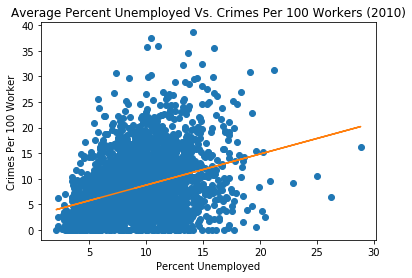

In [286]:
x = year2010DF['Average Percent Unemployed']
y = year2010DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

plt.plot(x,y,'o', x, line)
plt.title('Average Percent Unemployed Vs. Crimes Per 100 Workers (2010)')
plt.xlabel("Percent Unemployed")
plt.ylabel('Crimes Per 100 Worker')
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")
plt.savefig('Unemployment_Vs_Crime2010.png')

Slope = 0.7403984795830282
R Value = 0.37750956685543813
P Value = 5.1213866132828935e-98


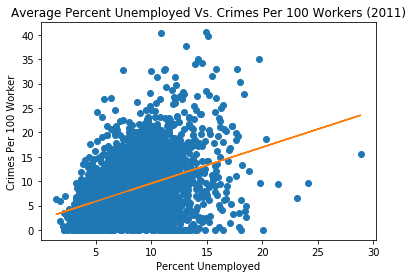

In [287]:
x2 = year2011DF['Average Percent Unemployed']
y2 = year2011DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x2,y2)
line2 = slope*x2+intercept

plt.plot(x2,y2,'o', x2, line2)
plt.title('Average Percent Unemployed Vs. Crimes Per 100 Workers (2011)')
plt.xlabel("Percent Unemployed")
plt.ylabel('Crimes Per 100 Worker')
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")
plt.savefig('Unemployment_Vs_Crime2011.png')

Slope = 0.7385440629885409
R Value = 0.35187436248489085
P Value = 1.557918763945471e-84


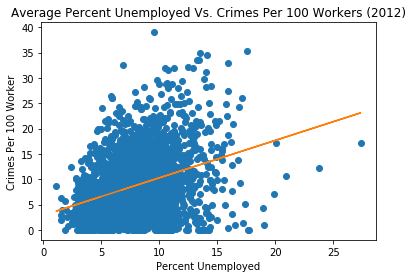

In [288]:
x3 = year2012DF['Average Percent Unemployed']
y3 = year2012DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x3,y3)
line3 = slope*x3+intercept

plt.plot(x3,y3,'o', x3, line3)
plt.title('Average Percent Unemployed Vs. Crimes Per 100 Workers (2012)')
plt.xlabel("Percent Unemployed")
plt.ylabel('Crimes Per 100 Worker')
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")
plt.savefig('Unemployment_Vs_Crime2012.png')

Slope = 0.6177716021936553
R Value = 0.2850124518317378
P Value = 7.582337529151424e-55


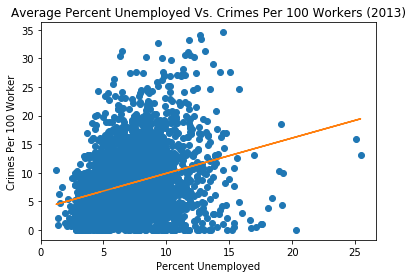

In [289]:
x3 = year2013DF['Average Percent Unemployed']
y3 = year2013DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x3,y3)
line3 = slope*x3+intercept

plt.plot(x3,y3,'o', x3, line3)
plt.title('Average Percent Unemployed Vs. Crimes Per 100 Workers (2013)')
plt.xlabel("Percent Unemployed")
plt.ylabel('Crimes Per 100 Worker')
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")
plt.savefig('Unemployment_Vs_Crime2013.png')

Slope = 0.7436763424762048
R Value = 0.28446793275492044
P Value = 1.2333260286598283e-54


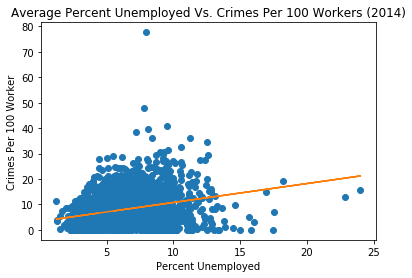

In [290]:
x4 = year2014DF['Average Percent Unemployed']
y4 = year2014DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x4,y4)
line4 = slope*x4+intercept

plt.plot(x4,y4,'o', x4, line4)
plt.title('Average Percent Unemployed Vs. Crimes Per 100 Workers (2014)')
plt.xlabel("Percent Unemployed")
plt.ylabel('Crimes Per 100 Worker')
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")
plt.savefig('Unemployment_Vs_Crime2014.png')

Slope = 0.7775635564513047
R Value = 0.2524658986760794
P Value = 4.947563660319415e-43


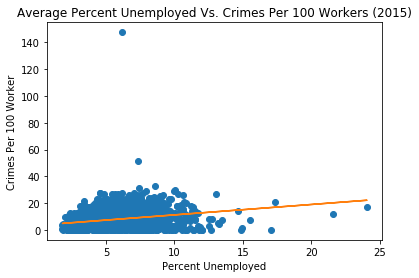

In [291]:
x5 = year2015DF['Average Percent Unemployed']
y5 = year2015DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x5,y5)
line5 = slope*x5+intercept

plt.plot(x5,y5,'o', x5, line5)
plt.title('Average Percent Unemployed Vs. Crimes Per 100 Workers (2015)')
plt.xlabel("Percent Unemployed")
plt.ylabel('Crimes Per 100 Worker')
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")
plt.savefig('Unemployment_Vs_Crime2015.png')

In [292]:
year2010DF['Crimes Per Worker'] = year2010DF['Number of Crimes'] / year2010DF['Total Labor Force']
year2011DF['Crimes Per Worker'] = year2011DF['Number of Crimes'] / year2011DF['Total Labor Force']
year2012DF['Crimes Per Worker'] = year2012DF['Number of Crimes'] / year2012DF['Total Labor Force']
year2013DF['Crimes Per Worker'] = year2013DF['Number of Crimes'] / year2013DF['Total Labor Force']
year2014DF['Crimes Per Worker'] = year2014DF['Number of Crimes'] / year2014DF['Total Labor Force']
year2015DF['Crimes Per Worker'] = year2015DF['Number of Crimes'] / year2015DF['Total Labor Force']
year2014DF.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,Year,State,County,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force,Crimes Per 100 Workers,Crimes Per Worker
4,2014,AL,lee,3987.000000,5.566667,7671,71372.166670,10.747887,0.107479
10,2014,AL,bibb,616.666667,7.208333,403,8561.250000,4.707257,0.047073
16,2014,AL,clay,394.166667,7.158333,298,5513.250000,5.405160,0.054052
22,2014,AL,dale,1437.750000,7.058333,3159,20323.000000,15.543965,0.155440
28,2014,AL,hale,595.583333,9.883333,226,6033.916667,3.745494,0.037455


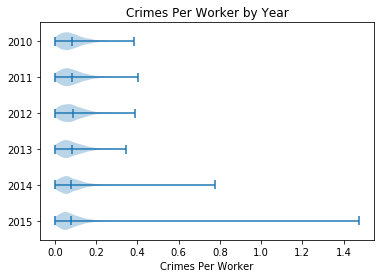

In [293]:
ax = plt.violinplot([year2015DF['Crimes Per Worker'], year2014DF['Crimes Per Worker'], 
                year2013DF['Crimes Per Worker'], year2012DF['Crimes Per Worker'], 
                year2011DF['Crimes Per Worker'], year2010DF['Crimes Per Worker']], vert = False,
                   showmeans = True)
plt.title("Crimes Per Worker by Year")
plt.xlabel("Crimes Per Worker")
plt.yticks([1,2,3,4,5,6], [2015,2014,2013,2012,2011,2010])
plt.savefig('Violin_ShowMeans.png')

In [294]:
top2010 = year2010DF.nlargest(10,'Crimes Per Worker')
top2011 = year2011DF.nlargest(10,'Crimes Per Worker')
top2012 = year2012DF.nlargest(10,'Crimes Per Worker')
top2013 = year2013DF.nlargest(10,'Crimes Per Worker')
top2014 = year2014DF.nlargest(10,'Crimes Per Worker')
top2015 = year2015DF.nlargest(10,'Crimes Per Worker')
top2014

,Year,State,County,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force,Crimes Per 100 Workers,Crimes Per Worker
2518,2014,GA,turner,257.750000,7.916667,2532,3257.166667,77.736274,0.777363
2116,2014,GA,polk,1427.416667,7.791667,8824,18342.750000,48.106200,0.481062
2242,2014,GA,lamar,740.333333,9.491667,3169,7786.416667,40.699081,0.406991
2620,2014,GA,decatur,922.500000,8.108333,4500,11373.916670,39.564208,0.395642
2530,2014,GA,walker,2110.833333,7.175000,11286,29396.083330,38.392870,0.383929
94,2014,AL,dallas,1799.000000,11.241667,5787,16008.250000,36.150110,0.361501
2866,2014,GA,muscogee,6776.333333,8.400000,29138,80811.000000,36.056972,0.360570
8812,2014,MS,washington,2299.083333,12.516667,6376,18363.416670,34.721207,0.347212
13156,2014,SC,marion,1355.833333,10.541667,4197,12860.083330,32.635869,0.326359
13144,2014,SC,dillon,1213.083333,9.608333,3947,12599.916670,31.325604,0.313256


In [295]:
top2010Unem = year2010DF.nlargest(10,'Average Percent Unemployed')
top2011Unem = year2011DF.nlargest(10,'Average Percent Unemployed')
top2012Unem = year2012DF.nlargest(10,'Average Percent Unemployed')
top2013Unem = year2013DF.nlargest(10,'Average Percent Unemployed')
top2014Unem = year2014DF.nlargest(10,'Average Percent Unemployed')
top2015Unem = year2015DF.nlargest(10,'Average Percent Unemployed')
top2015Unem

,Year,State,County,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force,Crimes Per 100 Workers,Crimes Per Worker
1139,2015,CA,imperial,18811.166670,24.050000,13595,78162.083330,17.393344,0.173933
857,2015,AZ,yuma,20184.333330,21.583333,10756,93222.666670,11.537966,0.115380
10847,2015,NM,luna,1901.000000,17.341667,2303,10992.583330,20.950489,0.209505
8753,2015,MS,issaquena,71.583333,17.075000,0,418.916667,0.000000,0.000000
1019,2015,CA,colusa,1702.750000,15.508333,850,11069.916670,7.678468,0.076785
6263,2015,KY,magoffin,524.250000,14.933333,52,3508.750000,1.482009,0.014820
8759,2015,MS,jefferson,339.333333,14.875000,0,2277.583333,0.000000,0.000000
173,2015,AL,wilcox,414.083333,14.650000,392,2824.250000,13.879791,0.138798
14135,2015,TX,starr,3479.000000,13.466667,1959,25855.333330,7.576773,0.075768
869,2015,AZ,apache,2722.166667,13.250000,846,20517.833330,4.123242,0.041232


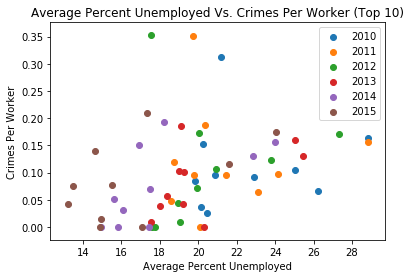

In [296]:
plt.scatter(top2010Unem['Average Percent Unemployed'], top2010Unem['Crimes Per Worker'])
plt.scatter(top2011Unem['Average Percent Unemployed'], top2011Unem['Crimes Per Worker'])
plt.scatter(top2012Unem['Average Percent Unemployed'], top2012Unem['Crimes Per Worker'])
plt.scatter(top2013Unem['Average Percent Unemployed'], top2013Unem['Crimes Per Worker'])
plt.scatter(top2014Unem['Average Percent Unemployed'], top2014Unem['Crimes Per Worker'])
plt.scatter(top2015Unem['Average Percent Unemployed'], top2015Unem['Crimes Per Worker'])
plt.title("Average Percent Unemployed Vs. Crimes Per Worker (Top 10)")
plt.xlabel("Average Percent Unemployed")
plt.ylabel("Crimes Per Worker")
plt.legend(['2010', '2011', '2012', '2013', '2014', '2015'])
plt.savefig('Unemployment_Vs_Crimes_Top10.png')

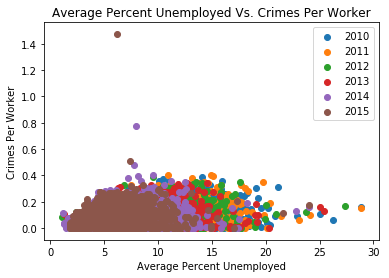

In [297]:
plt.scatter(year2010DF['Average Percent Unemployed'], year2010DF['Crimes Per Worker'])
plt.scatter(year2011DF['Average Percent Unemployed'], year2011DF['Crimes Per Worker'])
plt.scatter(year2012DF['Average Percent Unemployed'], year2012DF['Crimes Per Worker'])
plt.scatter(year2013DF['Average Percent Unemployed'], year2013DF['Crimes Per Worker'])
plt.scatter(year2014DF['Average Percent Unemployed'], year2014DF['Crimes Per Worker'])
plt.scatter(year2015DF['Average Percent Unemployed'], year2015DF['Crimes Per Worker'])
plt.legend([2010,2011,2012,2013,2014,2015])
plt.title("Average Percent Unemployed Vs. Crimes Per Worker")
plt.xlabel("Average Percent Unemployed")
plt.ylabel("Crimes Per Worker")
plt.savefig('Unemployment_Vs_Crimes_AllYears.png')

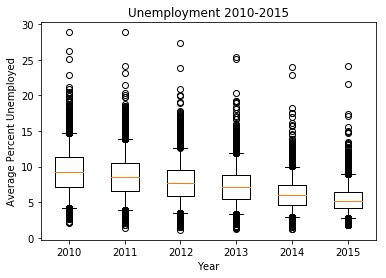

In [298]:
plt.boxplot([year2010DF['Average Percent Unemployed'], year2011DF['Average Percent Unemployed'],
            year2012DF['Average Percent Unemployed'], year2013DF['Average Percent Unemployed'],
            year2014DF['Average Percent Unemployed'], year2015DF['Average Percent Unemployed']]
            , vert = True, whis = [5,95], labels=[2010, 2011, 2012, 2013, 2014, 2015])
plt.title("Unemployment 2010-2015")
plt.xlabel("Year")
plt.ylabel("Average Percent Unemployed")
plt.savefig('Box_Unemployement.png')

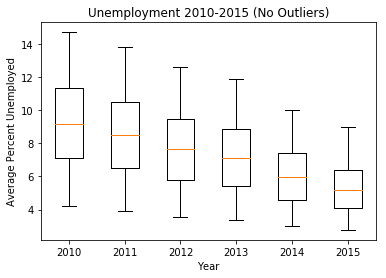

In [299]:
plt.boxplot([year2010DF['Average Percent Unemployed'], year2011DF['Average Percent Unemployed'],
            year2012DF['Average Percent Unemployed'], year2013DF['Average Percent Unemployed'],
            year2014DF['Average Percent Unemployed'], year2015DF['Average Percent Unemployed']]
            , vert = True, whis = [5,95], labels=[2010, 2011, 2012, 2013, 2014, 2015], showfliers = False)
plt.title("Unemployment 2010-2015 (No Outliers)")
plt.xlabel("Year")
plt.ylabel("Average Percent Unemployed")
plt.savefig('Box_Unemployment_NoOutliers.png')

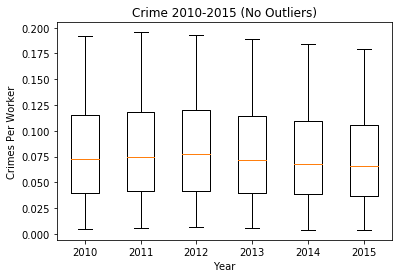

In [300]:
plt.boxplot([year2010DF['Crimes Per Worker'], year2011DF['Crimes Per Worker'],
            year2012DF['Crimes Per Worker'], year2013DF['Crimes Per Worker'],
            year2014DF['Crimes Per Worker'], year2015DF['Crimes Per Worker']]
            , vert = True, whis = [5,95], labels=[2010, 2011, 2012, 2013, 2014, 2015], 
           showfliers = False)
plt.title("Crime 2010-2015 (No Outliers)")
plt.xlabel("Year")
plt.ylabel("Crimes Per Worker")
plt.savefig('Box_Crime_NoOutliers.png')

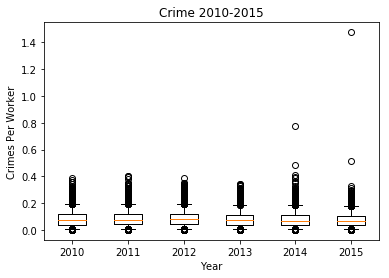

In [301]:
plt.boxplot([year2010DF['Crimes Per Worker'], year2011DF['Crimes Per Worker'],
            year2012DF['Crimes Per Worker'], year2013DF['Crimes Per Worker'],
            year2014DF['Crimes Per Worker'], year2015DF['Crimes Per Worker']]
            , vert = True, whis = [5,95], labels=[2010, 2011, 2012, 2013, 2014, 2015])
plt.title("Crime 2010-2015")
plt.xlabel("Year")
plt.ylabel("Crimes Per Worker")
plt.savefig('Box_Crime.png')

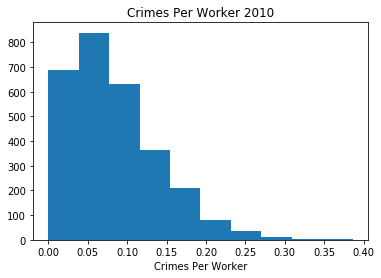

In [302]:
plt.hist(year2010DF['Crimes Per Worker'])
plt.xlabel('Crimes Per Worker')
plt.title("Crimes Per Worker 2010")
plt.savefig('CrimesHist2010.png')

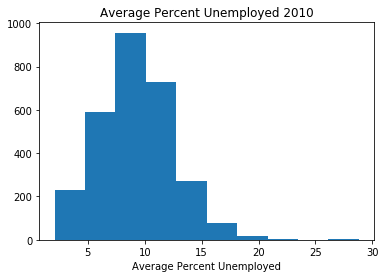

In [303]:
plt.hist(year2010DF['Average Percent Unemployed'])
plt.xlabel('Average Percent Unemployed')
plt.title("Average Percent Unemployed 2010")
plt.savefig('UnemploymentHist2010.png')

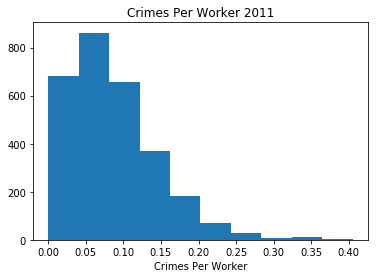

In [304]:
plt.hist(year2011DF['Crimes Per Worker'])
plt.xlabel('Crimes Per Worker')
plt.title("Crimes Per Worker 2011")
plt.savefig('CrimesHist2011.png')

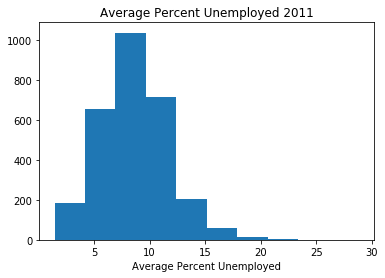

In [305]:
plt.hist(year2011DF['Average Percent Unemployed'])
plt.xlabel('Average Percent Unemployed')
plt.title("Average Percent Unemployed 2011")
plt.savefig('UnemploymentHist2011.png')

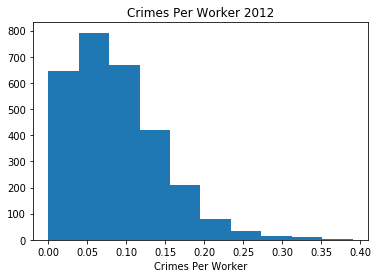

In [306]:
plt.hist(year2012DF['Crimes Per Worker'])
plt.xlabel('Crimes Per Worker')
plt.title("Crimes Per Worker 2012")
plt.savefig('CrimesHist2012.png')

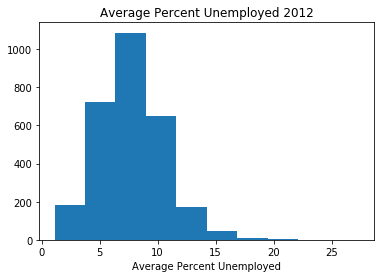

In [307]:
plt.hist(year2012DF['Average Percent Unemployed'])
plt.xlabel('Average Percent Unemployed')
plt.title("Average Percent Unemployed 2012")
plt.savefig('UnemploymentHist2012.png')

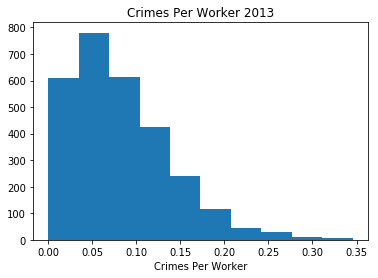

In [308]:
plt.hist(year2013DF['Crimes Per Worker'])
plt.xlabel('Crimes Per Worker')
plt.title("Crimes Per Worker 2013")
plt.savefig('CrimesHist2013.png')

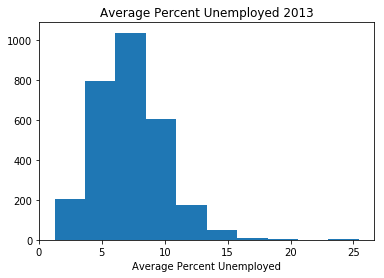

In [309]:
plt.hist(year2013DF['Average Percent Unemployed'])
plt.xlabel('Average Percent Unemployed')
plt.title("Average Percent Unemployed 2013")
plt.savefig('UnemploymentHist2013.png')

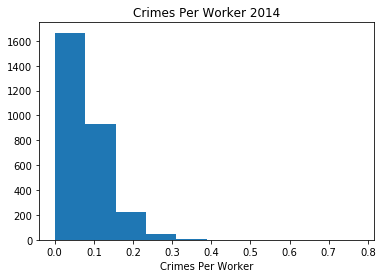

In [310]:
plt.hist(year2014DF['Crimes Per Worker'])
plt.xlabel('Crimes Per Worker')
plt.title("Crimes Per Worker 2014")
plt.savefig('CrimesHist2014.png')

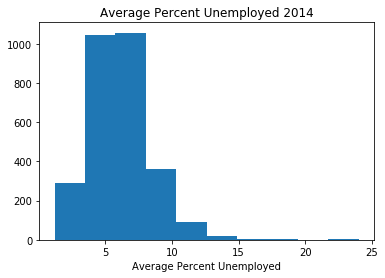

In [311]:
plt.hist(year2014DF['Average Percent Unemployed'])
plt.xlabel('Average Percent Unemployed')
plt.title("Average Percent Unemployed 2014")
plt.savefig('UnemploymentHist2014.png')

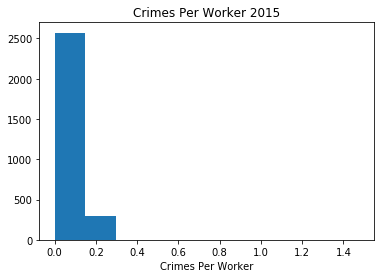

In [312]:
plt.hist(year2015DF['Crimes Per Worker'])
plt.xlabel('Crimes Per Worker')
plt.title("Crimes Per Worker 2015")
plt.savefig('CrimesHist2015.png')

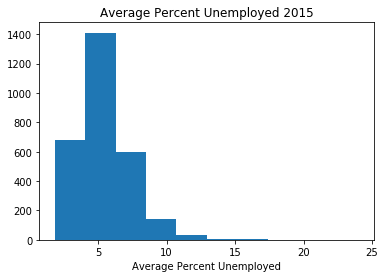

In [313]:
plt.hist(year2015DF['Average Percent Unemployed'])
plt.xlabel('Average Percent Unemployed')
plt.title("Average Percent Unemployed 2015")
plt.savefig('UnemploymentHist2015.png')

In [314]:
np.corrcoef(year2010DF['Average Percent Unemployed'], year2010DF['Crimes Per 100 Workers'])

array([[1.        , 0.33204245],
       [0.33204245, 1.        ]])

In [315]:
np.corrcoef(year2011DF['Average Percent Unemployed'], year2011DF['Crimes Per 100 Workers'])

array([[1.        , 0.37750957],
       [0.37750957, 1.        ]])

In [316]:
np.corrcoef(year2012DF['Average Percent Unemployed'], year2012DF['Crimes Per 100 Workers'])

array([[1.        , 0.35187436],
       [0.35187436, 1.        ]])

In [317]:
np.corrcoef(year2013DF['Average Percent Unemployed'], year2013DF['Crimes Per 100 Workers'])

array([[1.        , 0.28501245],
       [0.28501245, 1.        ]])

In [318]:
np.corrcoef(year2014DF['Average Percent Unemployed'], year2014DF['Crimes Per 100 Workers'])

array([[1.        , 0.28446793],
       [0.28446793, 1.        ]])

In [319]:
np.corrcoef(year2015DF['Average Percent Unemployed'], year2015DF['Crimes Per 100 Workers'])

array([[1.       , 0.2524659],
       [0.2524659, 1.       ]])

In [320]:
np.corrcoef(formattedDF['Average Percent Unemployed'], formattedDF['Crimes Per 100 Workers'])

array([[1.        , 0.30320265],
       [0.30320265, 1.        ]])